In [161]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def get_folders_statistics(directory):
    class Stats:
        def __init__(self, info):
            self.info = info
            self.nr_of_elements = sum(info.values())

        def bar_plot(self, figsize=(10, 5), xticks_rotation=60, ticks_size=8, labels_size=10, **kwargs):
            df = pd.DataFrame(self.info, index=[0])
            fig, ax = plt.subplots(figsize=figsize)
            f = sns.barplot(data=df, ax=ax)
            f.set(xlabel='Classes', ylabel='Images')
            f.set_xticklabels(f.get_xticklabels(), rotation=xticks_rotation, horizontalalignment='right',
                              size=ticks_size, **kwargs)
            yticks = [int(tick) for tick in f.get_yticks()]
            f.set_yticklabels(yticks, size=ticks_size, **kwargs)
            plt.rcParams["axes.labelsize"] = labels_size
            return fig

    subfolders, counted_pictures = [], []

    for element in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, element)):
            subfolders.append(element)

    for folder in subfolders:
        path = os.path.join(directory, folder)
        nr_of_pictures = len(os.listdir(path))
        counted_pictures.append(nr_of_pictures)

    inf = {key: value for key, value in zip(subfolders, counted_pictures)}
    return Stats(inf)

abc


D:\Inne\DevelopmentEnviroments\Miniconda\envs\Plant_disease_recognition\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


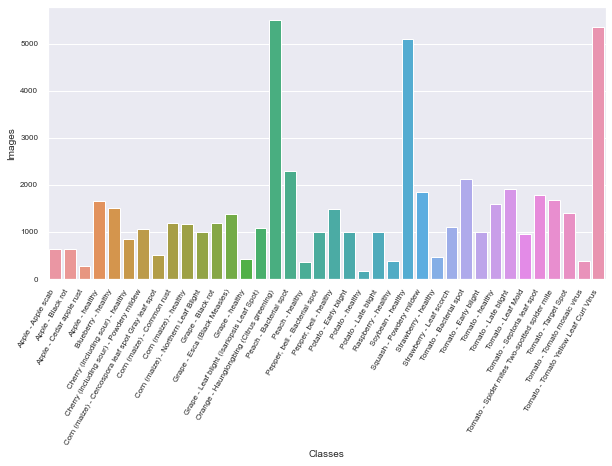

In [162]:
from pprint import pprint
inf = get_folders_statistics('../data/segmented')
# pprint(inf.nr_of_elements)
print('abc')
fig = inf.bar_plot()
fig.savefig('test', bbox_inches='tight', dpi=300)